In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.naive_bayes import GaussianNB

In [34]:
data = pd.read_csv("calories_data.csv")

In [35]:
data.head()

,Gender,Height,Weight,age,activity_level,BMR,activity_multiplier,TDEE
0,Male,161,89,18,Very active,1645.25,1.725,2838.05625
1,Male,179,127,21,Very active,2122.75,1.725,3661.74375
2,Male,172,139,33,Moderately active,2139.00,1.550,3315.45000
3,Male,153,104,23,Very active,1720.25,1.725,2967.43125
4,Male,165,68,39,Moderately active,1355.25,1.550,2100.63750


In [37]:
data = data.drop("TDEE" ,axis = 1)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               500 non-null    object 
 1   Height               500 non-null    int64  
 2   Weight               500 non-null    int64  
 3   age                  500 non-null    int64  
 4   activity_level       500 non-null    object 
 5   BMR                  500 non-null    float64
 6   activity_multiplier  500 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 27.5+ KB


In [39]:
data.shape

(500, 7)

In [40]:
data.describe()

,Height,Weight,age,BMR,activity_multiplier
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,169.944000,106.000000,30.060000,1810.850000,1.575550
std,16.375261,32.382607,9.886551,346.121189,0.129758
min,140.000000,50.000000,18.000000,1084.000000,1.200000
25%,156.000000,80.000000,22.000000,1527.437500,1.550000
50%,170.500000,106.000000,29.000000,1827.125000,1.550000
75%,184.000000,136.000000,36.000000,2098.062500,1.725000
max,199.000000,160.000000,65.000000,2527.750000,1.725000


In [41]:
data.isna().sum()

Gender                 0
Height                 0
Weight                 0
age                    0
activity_level         0
BMR                    0
activity_multiplier    0
dtype: int64

In [42]:
data.duplicated().sum()

1

In [43]:
# Convert categorical columns to numerical
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})  # Example mapping
data['activity_level'] = data['activity_level'].map({
    'Sedentary': 1,
    'Lightly active': 2,
    'Moderately active': 3,
    'Very active': 4
})
data

,Gender,Height,Weight,age,activity_level,BMR,activity_multiplier
0,0,161,89,18,4,1645.25,1.725
1,0,179,127,21,4,2122.75,1.725
2,0,172,139,33,3,2139.00,1.550
3,0,153,104,23,4,1720.25,1.725
4,0,165,68,39,3,1355.25,1.550
...,...,...,...,...,...,...,...
495,0,162,58,18,4,1341.50,1.725
496,1,175,141,28,3,2202.75,1.550
497,1,197,154,18,4,2520.25,1.725
498,0,188,65,51,2,1409.00,1.375


In [44]:
X = data.drop(columns='BMR')
y = data['BMR']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

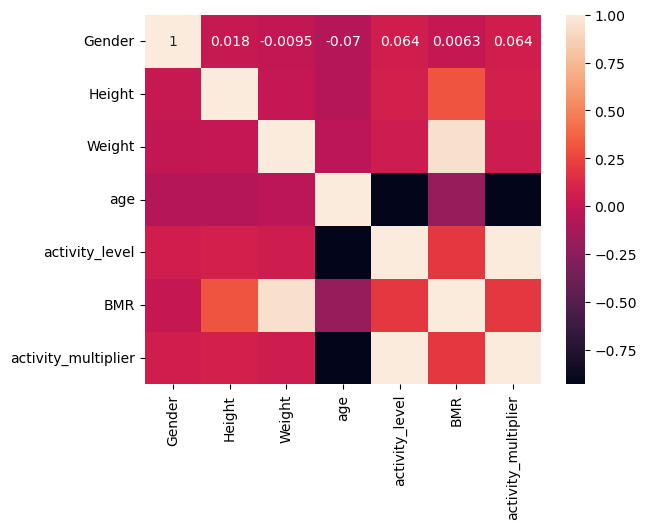

In [46]:
corr = data.corr()
sns.heatmap(corr, annot = True)

In [47]:
print(corr)

                       Gender    Height    Weight       age  activity_level  \
Gender               1.000000  0.017677 -0.009523 -0.069795        0.063571   
Height               0.017677  1.000000  0.000446 -0.069818        0.077588   
Weight              -0.009523  0.000446  1.000000 -0.040055        0.044486   
age                 -0.069795 -0.069818 -0.040055  1.000000       -0.931219   
activity_level       0.063571  0.077588  0.044486 -0.931219        1.000000   
BMR                  0.006286  0.306081  0.941438 -0.200939        0.197558   
activity_multiplier  0.063571  0.077588  0.044486 -0.931219        1.000000   

                          BMR  activity_multiplier  
Gender               0.006286             0.063571  
Height               0.306081             0.077588  
Weight               0.941438             0.044486  
age                 -0.200939            -0.931219  
activity_level       0.197558             1.000000  
BMR                  1.000000             0.19755

In [48]:
X_train

,Gender,Height,Weight,age,activity_level,activity_multiplier
249,1,147,94,58,1,1.200
433,1,196,131,44,2,1.375
19,0,157,56,31,3,1.550
322,1,142,86,39,3,1.550
332,1,161,145,23,4,1.725
...,...,...,...,...,...,...
106,1,171,120,18,4,1.725
270,0,187,62,29,3,1.550
348,1,155,115,34,3,1.550
435,1,172,62,29,3,1.550


In [49]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [50]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, explained_variance_score

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)  # Coefficient of determination
    mape = mean_absolute_percentage_error(y_test, y_pred)  # Mean absolute percentage error
    evs = explained_variance_score(y_test, y_pred)  # Explained variance score
    
    # Adjusted R² (to account for the number of predictors)
    n = len(y_test)  # Number of data points
    p = X_test.shape[1]  # Number of features
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    # Print results
    print(f"{model_name}:")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²: {r2:.4f}")
    print(f"  Adjusted R²: {adj_r2:.4f}")
    print(f"  MAPE: {mape:.4f}")
    print(f"  Explained Variance Score: {evs:.4f}")
    print()


Linear Regression:
  MAE: 0.0000
  RMSE: 0.0000
  R²: 1.0000
  Adjusted R²: 1.0000
  MAPE: 0.0000
  Explained Variance Score: 1.0000

Random Forest:
  MAE: 30.5061
  RMSE: 39.7613
  R²: 0.9890
  Adjusted R²: 0.9883
  MAPE: 0.0176
  Explained Variance Score: 0.9890

Gradient Boosting:
  MAE: 22.2535
  RMSE: 27.8913
  R²: 0.9946
  Adjusted R²: 0.9942
  MAPE: 0.0132
  Explained Variance Score: 0.9946



In [51]:
GBR = GradientBoostingRegressor(n_estimators=100, random_state=42)
GBR.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [57]:
# Function to take user input and predict BMR and TDEE
def predict_bmr_tdee():
    # Get user input
    gender = input("Enter Gender (Male/Female): ")
    height = float(input("Enter Height in cm: "))
    weight = float(input("Enter Weight in kg: "))
    age = int(input("Enter Age: "))
    activity_level = input("Enter Activity Level (Sedentary/Lightly active/Moderately active/Very active): ")
    
    # Map input data to model input format
    gender = 0 if gender.lower() == 'male' else 1
    activity_level_map = {
        'Sedentary': 1,
        'Lightly active': 2,
        'Moderately active': 3,
        'Very active': 4
    }
    activity_level_value = activity_level_map.get(activity_level, 1)  # Default to Sedentary if invalid input
    
    activity_level_number_map = {
        'Sedentary': 1.2,
        'Lightly active': 1.375,
        'Moderately active': 1.55,
        'Very active': 1.725
    }
    activity_multiplier = activity_level_number_map.get(activity_level, 1.2)  # Default to Sedentary if invalid input
    

    # Prepare input data as a DataFrame for BMR prediction
    input_data = pd.DataFrame([[gender, height, weight, age,activity_level_value,activity_multiplier]], columns=['Gender', 'Height', 'Weight', 'age','activity_level','activity_multiplier'])
    
    # Predict BMR using the trained Random Forest model
    bmr_prediction = GBR.predict(input_data)
    
    # Calculate TDEE (BMR * activity level multiplier)
    tdee_prediction = bmr_prediction[0] * activity_multiplier
    
    # Print the result
    print(f"Predicted BMR: {bmr_prediction[0]:.2f} calories/day")
    print(f"Predicted TDEE: {tdee_prediction:.2f} calories/day")

# Call the function to test the model
predict_bmr_tdee()


Predicted BMR: 1590.79 calories/day
Predicted TDEE: 2744.11 calories/day


In [55]:
import joblib
# Save the model
joblib.dump(GBR, 'Gradient_Boosting_model_for_calories.pkl')

print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Train the Random Forest model
RFR = RandomForestRegressor(n_estimators=100, random_state=42)
RFR.fit(X, y)